In [15]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

dataset_path = 'Backend/resources/dataset.csv'

df = pd.read_csv(dataset_path)

df.head()


,text,category
0,نظم عهد شرق لفن عرض فنا تحت عنو بقة الف وذل سع...,Culture
1,تقم فنن ليت كابيلو عرض طلع عام دبي يضم عرض لوح...,Culture
2,وصل يلة سير تحد تعة ءثر نفس يرق لقب شعر ملي نس...,Culture
3,عقد ظهر ءمس ءول قصر ثقف شرق جلس ءخر جلس لقى ءو...,Culture
4,خار صحف يمز جورج ءورويل يحل رتب قءم تضم ءعظم خ...,Culture


In [2]:
# Extract text and category columns
texts = df['text'].tolist()
categories = df['category'].tolist()

# Initialize the TF-IDF Vectorizer and generate embeddings
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Encode categories if necessary
y = pd.factorize(categories)[0]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\karam\AppData\Local\Temp\ipykernel_10308\1468765013.py:14: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  y = pd.factorize(categories)[0]


In [3]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the GridSearchCV for parameter tuning
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model Accuracy on Test Data:", best_model.score(X_test, y_test))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Model Accuracy on Test Data: 0.9448048378229796


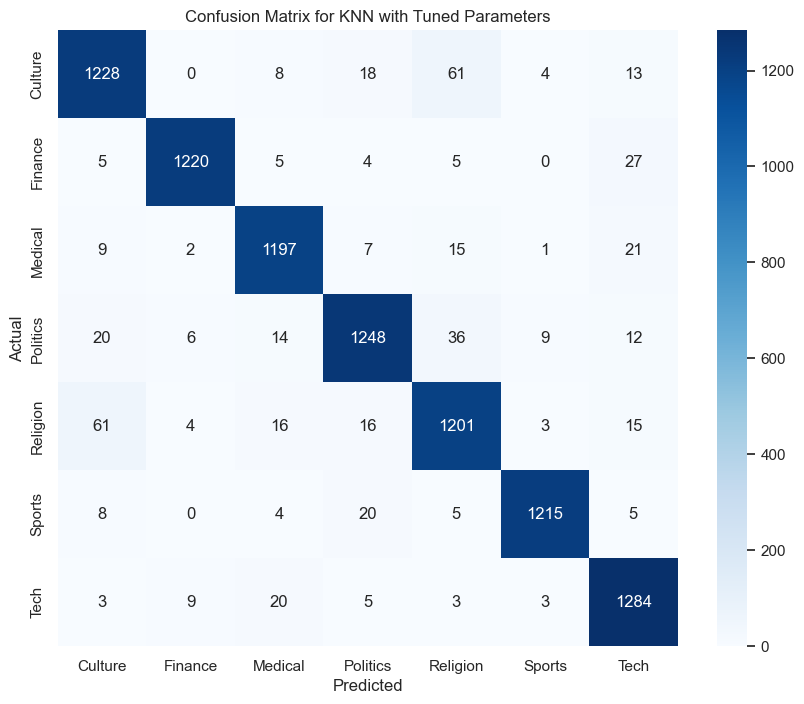

Accuracy (Best Model): 0.9448048378229796
Precision (Best Model): 0.9451238345732549
Recall (Best Model): 0.9448048378229796
F1 Score (Best Model): 0.9448737727919599


In [4]:
# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Calculate and display evaluation metrics
print("Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))
print("Precision (Best Model):", precision_score(y_test, y_pred_best, average="weighted"))
print("Recall (Best Model):", recall_score(y_test, y_pred_best, average="weighted"))
print("F1 Score (Best Model):", f1_score(y_test, y_pred_best, average="weighted"))


In [5]:
model_dir = 'Backend/Models/KNN'

# Create directories if they don't exist
os.makedirs(model_dir, exist_ok=True)

# Save the TF-IDF vectorizer and tuned KNN model
joblib.dump(vectorizer, os.path.join(model_dir, "tfidf.pkl"))
joblib.dump(best_model, os.path.join(model_dir, "KNN_model.pkl"))

print("Best model and vectorizer saved successfully in Models/KNN directory.")


Best model and vectorizer saved successfully in Models/KNN directory.
